# Final Lab
## Math 387

## Question 1

We have that $f_a = x^a if x>0, 0 otherwise$ Thus we know that $\forall a \in R, x^a \in C^{\infty}(R) $
Therefore we can deduce that $\forall a \in R, f_a \in C^{\lfloor a \rfloor}([-1; 1]) $
Now as a result we have the following: $\forall a \in R, f_a \in C^{\lfloor a \rfloor, a \mod 1}([-1; 1]) $

$ a \mod 1 $ being the decimal part of a

## Question 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scp

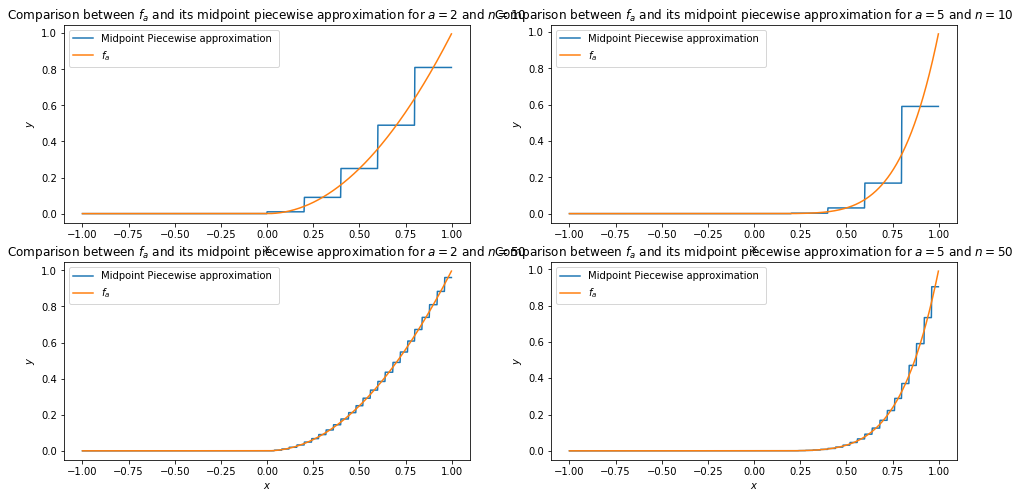

In [12]:
def create_fa(a):
    def fa(x): 
        if x>0:
            return x**a
        else: 
            return 0
    return fa

def piecewise_approximation_midpoint(f,n):
    def f_temp(x):
        midpoint = x - (x % (2/n)) + (1/n) #compute the midpoint for the approximation
        return f(midpoint)
    return f_temp


fig = plt.figure(figsize=(16,8))
subplts = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

xlist = np.linspace(-1, 1, 1000, endpoint=False)

for k in [[0,2,10],[1,5, 10],[2,2, 50],[3,5, 50]]:
    
    fa = create_fa(k[1])

    ylist = []
    approx = piecewise_approximation_midpoint(fa, k[2])
    for x in xlist:
        ylist.append(approx(x))
    
    subplts[k[0]].plot(xlist,ylist, label='Midpoint Piecewise approximation ')
          
    ylist = []
    for x in xlist:
        ylist.append(fa(x))
    
    subplts[k[0]].plot(xlist,ylist, label='$f_a$')
          
    subplts[k[0]].set_title(r'Comparison between $f_a$ and its midpoint piecewise approximation for $a=%d$ and $n=%d$'%(k[1], k[2]))
    subplts[k[0]].set_xlabel(r'$x$')
    subplts[k[0]].set_ylabel(r'$y$')
    subplts[k[0]].legend()
        
plt.show()

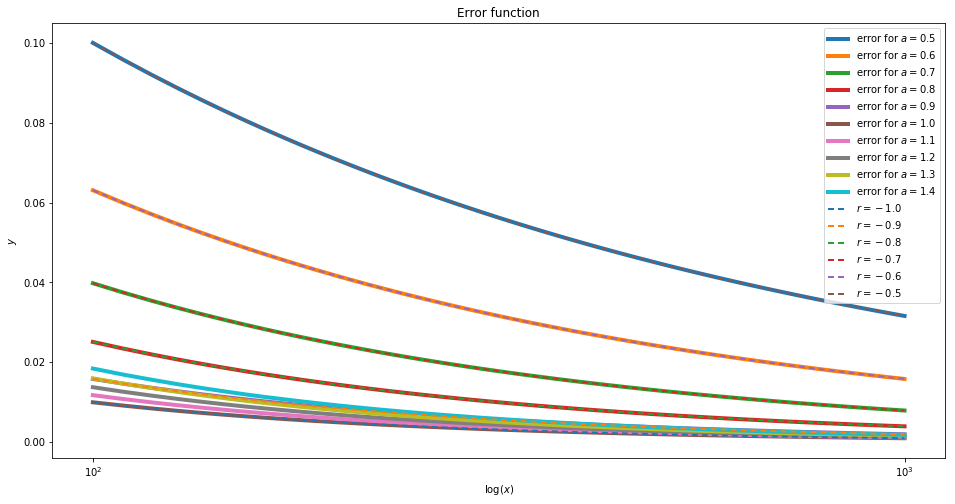

In [50]:
def error_estimate_midpoint(f, approx, n): #We know that the largest error are at the bounds of piecewise approximation
    err = 0
    for i in range(0, n+1):
        err = max(err, np.absolute(f(2*i/n)-approx(2*i/n)))
    return err
   
plt.figure(figsize=(16,8))

nlist = np.linspace(100, 1000, 100, dtype=int)

for a in np.arange(0.5, 1.5, 0.1):
    fa = create_fa(a)
    
    ylist = []
    for n in nlist:
        approx = piecewise_approximation_midpoint(fa, n)
        ylist.append(error_estimate_midpoint(fa, approx, n))
       
    plt.plot(nlist,ylist, lw=4, label="error for $a=%.1f$"%a)

plt.title(r'Error function')

for r in np.arange(-1, -0.4, 0.1):
    ylist = np.power(nlist, r)
    plt.plot(nlist,ylist, lw=2, dashes=[3, 2], label="$r=%.1f$"%r)


plt.xscale('symlog')
plt.xlabel(r'$\log(x)$')
plt.ylabel('$y$')
plt.legend()
plt.show()


It appears that the functions have a convergence rate approximately equal to $-\alpha$, thus $r \approx -\alpha$. And as $\alpha = a \mod 1$ (the decimal part of a), this yields $r(a) \approx - (a \mod 1)$.

The midpoint approximation as degree of exactness of 1. Thus is appears logical that the rate of convergence is approximately one. And The regularity of the function explains the divergence around that rate of convergence.

## Question 3

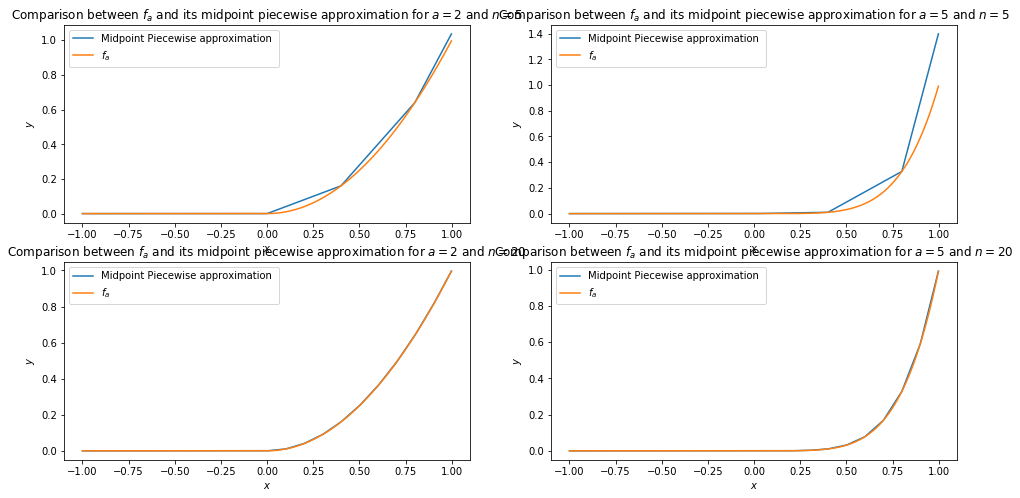

In [16]:
def piecewise_approximation_trapezoid(f,n):
    def f_temp(x):
        a = x - (x % (2/n)) #compute the midpoint for the approximation
        b = x - (x % (2/n)) + (2/n)
        fa = f(a)
        fb = f(b)
        return f(a) + (f(b) - f(a))/(b-a) * (x%(2/n))
    return f_temp

fig = plt.figure(figsize=(16,8))
subplts = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

xlist = np.linspace(-1, 1, 1000, endpoint=False)

for k in [[0,2,5],[1,5, 5],[2,2, 20],[3,5, 20]]:
    
    fa = create_fa(k[1])

    ylist = []
    approx = piecewise_approximation_trapezoid(fa, k[2])
    for x in xlist:
        ylist.append(approx(x))
    subplts[k[0]].plot(xlist,ylist, label='Midpoint Piecewise approximation ')
   
    ylist = []
    for x in xlist:      
        ylist.append(fa(x))
    subplts[k[0]].plot(xlist,ylist, label='$f_a$')
          
    subplts[k[0]].set_title(r'Comparison between $f_a$ and its midpoint piecewise approximation for $a=%d$ and $n=%d$'%(k[1], k[2]))
    subplts[k[0]].set_xlabel(r'$x$')
    subplts[k[0]].set_ylabel(r'$y$')
    subplts[k[0]].legend()
        
plt.show()

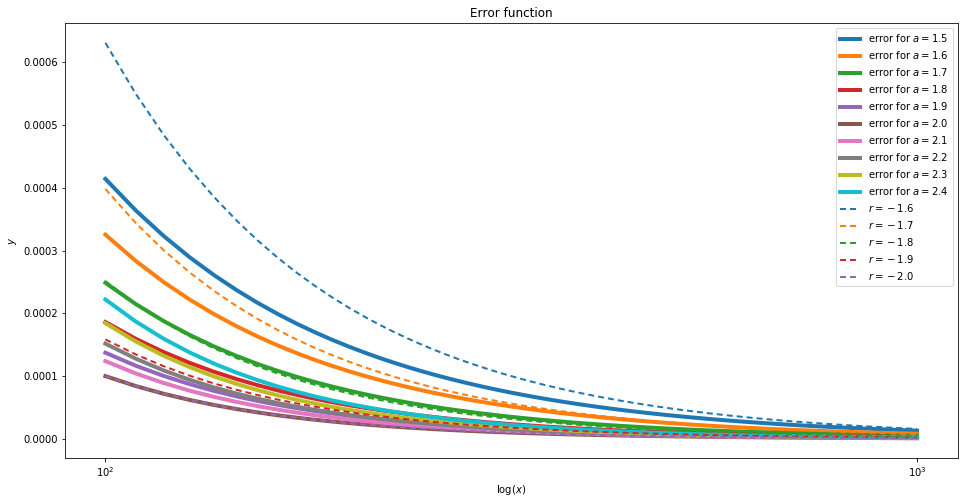

In [53]:
def error_estimate_trapezoid(f, approx, n): #We know that the largest error are at the bounds of piecewise approximation
    err = 0
    for i in range(0, n+1):
        err = max(err, np.absolute(f((2*i+1)/n)-approx((2*i+1)/n)))
    return err

plt.figure(figsize=(16,8))

nlist = np.linspace(100, 1000, 100, dtype=int)

for a in np.arange(1.5, 2.5, 0.1):
    fa = create_fa(a)
    
    ylist = []
    for n in nlist:
        approx = piecewise_approximation_trapezoid(fa, n)
        ylist.append(error_estimate_trapezoid(fa, approx, n))
       
    plt.plot(nlist,ylist, lw=4, label="error for $a=%.1f$"%a)

plt.title(r'Error function')

for r in np.arange(-1.6, -2.1, -0.1):
    ylist = np.power(nlist, r)
    plt.plot(nlist,ylist, lw=2, dashes=[3, 2], label="$r=%.1f$"%r)


plt.xscale('symlog')
plt.xlabel(r'$\log(x)$')
plt.ylabel('$y$')
plt.legend()
plt.show()



The behavior is similar but the rate of convergence is better. It can be explain by the degree of exactness. Here we use an approximation with a degree of exactness equal to 2. Thus it seems completely logical that the best rate of convergence is 2. and attained for a=2. And once again the rate of convergence is affected by the regularity of the function

## Question 4


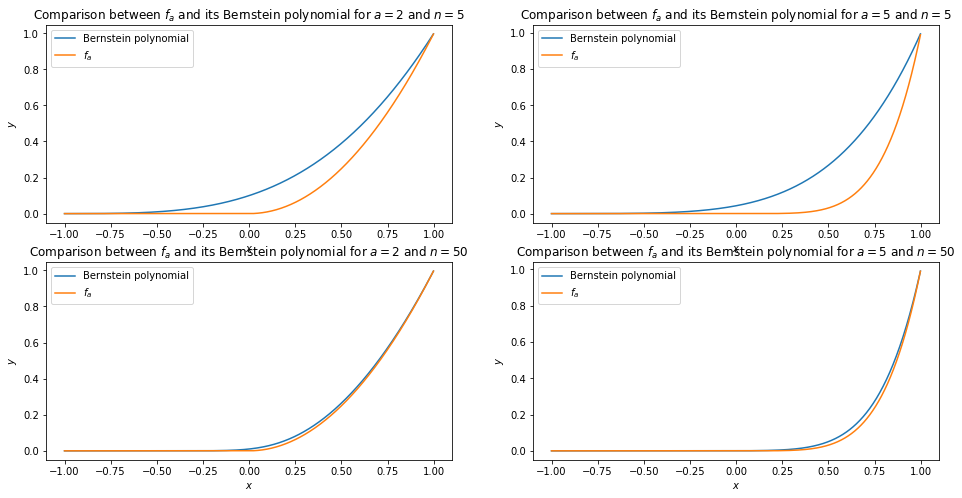

In [23]:
def bernstein_polynomial(k, n):
    def f(x):
        x = (x+1)/2 # Map [-1;1] to [0;1]
        return (scp.comb(n,k))*(x**k)*((1-x)**(n-k))
    return f

def bernstein_approx(f, n):
    def approx(x):
        res = 0
        for i in range(n+1):
            pol = bernstein_polynomial(i, n)
            res += f((2*i)/n - 1) * pol(x)
        return res
    return approx

fig = plt.figure(figsize=(16,8))
subplts = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

xlist = np.linspace(-1, 1, 1000, endpoint=False)

for k in [[0,2,5],[1,5, 5],[2,2, 50],[3,5, 50]]:
    
    fa = create_fa(k[1])

    ylist = []
    approx = bernstein_approx(fa, k[2])
    for x in xlist:
        ylist.append(approx(x))
    subplts[k[0]].plot(xlist,ylist, label='Bernstein polynomial')
    
    ylist = []
    for x in xlist:      
        ylist.append(fa(x))
    subplts[k[0]].plot(xlist,ylist, label='$f_a$')

          
    subplts[k[0]].set_title(r'Comparison between $f_a$ and its Bernstein polynomial for $a=%d$ and $n=%d$'%(k[1], k[2]))
    subplts[k[0]].set_xlabel(r'$x$')
    subplts[k[0]].set_ylabel(r'$y$')
    subplts[k[0]].legend()
        
plt.show()

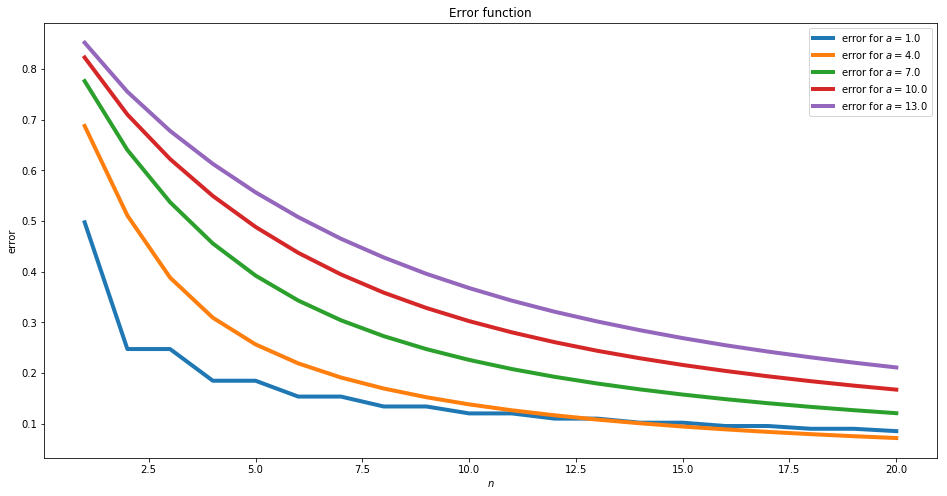

In [54]:
def error_estimate_general(f, approx): #We know that the largest error are at the bounds of piecewise approximation
    xlist = np.linspace(-1, 1, 200, endpoint=True)
    err = 0
    for x in xlist:
        err = max(err, np.absolute(f(x)-approx(x)))
    return err

plt.figure(figsize=(16,8))

nlist = np.linspace(1, 20, 50, dtype=int)

for a in np.arange(1, 15, 3):
    fa = create_fa(a)
    
    ylist = []
    for n in nlist:
        approx = bernstein_approx(fa, n)
        ylist.append(error_estimate_general(fa, approx))
       
    plt.plot(nlist,ylist, lw=4, label="error for $a=%.1f$"%a)

plt.title(r'Error function')

plt.xlabel(r'$n$')
plt.ylabel('error')
plt.legend()
plt.show()

Here the degree of exactness depends on the degree of the polynomials used for the approximation. Therefore we cannot use the same formula as previously. The rate of convergence is dependent on a, but is far more affected by n.

## Question 5

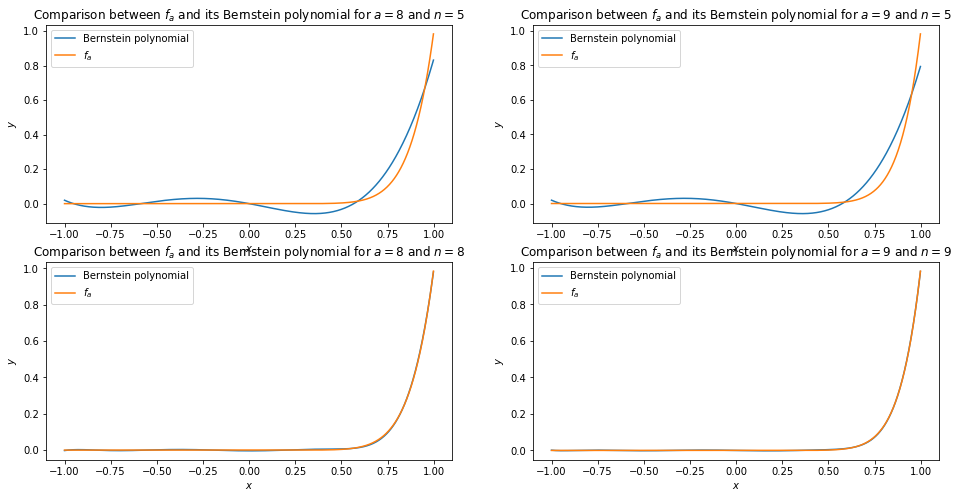

In [37]:
def chebyshev_nodes(n): #Compute the Chebyshev nodes
    points = []
    for i in range(1, n+1):
        points.append(np.cos((2*i-1)*np.pi/(2*n)))
    return points
    
def lagrange_polynomial(k, points): #Compute Lagrange polynomial for the point k of the points list
    def f(x):
        prod = 1
        for i in range(len(points)):
            if (i != k): 
                prod *= (x - points[i])/(points[k] - points[i])
        return prod
    return f

def chebyshev_approximation(f, n):
    points = chebyshev_nodes(n)
    def approx(x):
        res = 0
        for i in range(len(points)):
            pol = lagrange_polynomial(i, points)
            res += f(points[i])*pol(x)
        return res
    return approx

fig = plt.figure(figsize=(16,8))
subplts = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

xlist = np.linspace(-1, 1, 1000, endpoint=False)

for k in [[0,8,5],[1,9, 5],[2,8, 8],[3,9, 9]]:
    
    fa = create_fa(k[1])

    ylist = chebyshev_approximation(fa, k[2])(xlist)
    subplts[k[0]].plot(xlist,ylist, label='Bernstein polynomial')
          
    ylist = []
    for x in xlist:      
        ylist.append(fa(x))
    subplts[k[0]].plot(xlist,ylist, label='$f_a$')

          
    subplts[k[0]].set_title(r'Comparison between $f_a$ and its Bernstein polynomial for $a=%d$ and $n=%d$'%(k[1], k[2]))
    subplts[k[0]].set_xlabel(r'$x$')
    subplts[k[0]].set_ylabel(r'$y$')
    subplts[k[0]].legend()
        
plt.show()

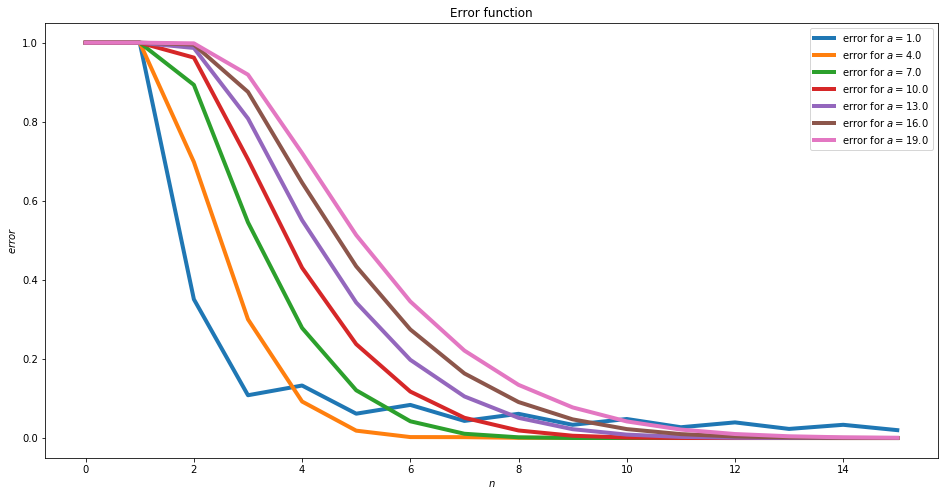

In [59]:
plt.figure(figsize=(16,8))

nlist = np.linspace(0, 15, 50, dtype=int)

for a in np.arange(1, 20, 3):
    fa = create_fa(a)
    
    ylist = []
    for n in nlist:
        approx = chebyshev_approximation(fa, n)
        ylist.append(error_estimate_general(fa, approx))
       
    plt.plot(nlist,ylist, lw=4, label="error for $a=%.1f$"%a)

plt.title(r'Error function')

plt.xlabel(r'$n$')
plt.ylabel('$error$')
plt.legend()
plt.show()

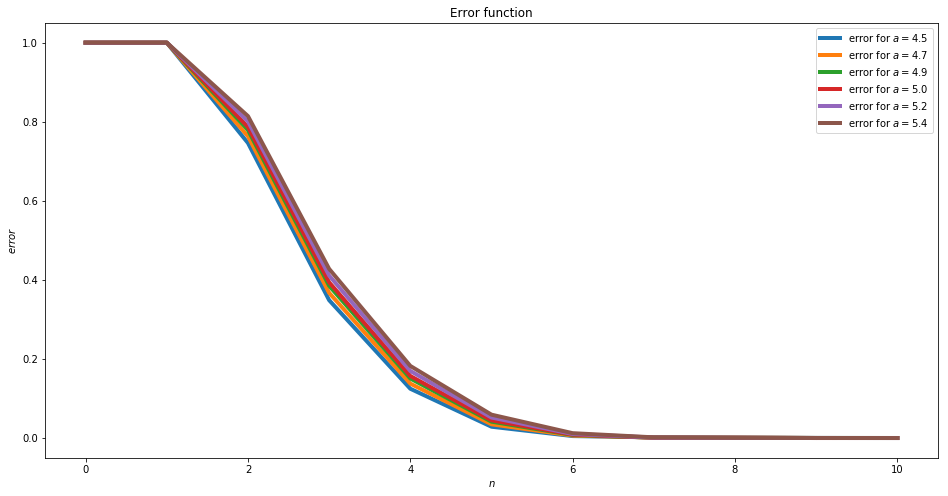

In [60]:
plt.figure(figsize=(16,8))

nlist = np.linspace(0, 10, 50, dtype=int)
for a in [4.5, 4.7,  4.9, 5, 5.2,  5.4]:
    fa = create_fa(a)
    
    ylist = []
    for n in nlist:
        approx = chebyshev_approximation(fa, n)
        ylist.append(error_estimate_general(fa, approx))
       
    plt.plot(nlist,ylist, lw=4, label="error for $a=%.1f$"%a)

plt.title(r'Error function')

plt.xlabel(r'$n$')
plt.ylabel('$error$')
plt.legend()
plt.show()

We can observe that the regularity of the function affect rate of convergence, but it has a very small impact. Again every function $f_a$ seems to have a rate of convergence increasing with n.